In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
array_tensor = torch.Tensor([1,2,3])
array_tensor

tensor([1., 2., 3.])

In [5]:
array_tensor = torch.Tensor([ [1,3,5,20], [1,6,7,210], [2,1,1,8] ])

In [6]:
array_tensor.shape, array_tensor

(torch.Size([3, 4]),
 tensor([[  1.,   3.,   5.,  20.],
         [  1.,   6.,   7., 210.],
         [  2.,   1.,   1.,   8.]]))

In [7]:
height, width = array_tensor.shape

print("Height, Width: ", height,width)
print("Columns: ")

for i in range(width):
    print(array_tensor[:,i])

print("Rows: ")
for j in range(height):
    print( array_tensor[j,:] )

print("Indexing: ")
array_tensor[1:height,1:width]

# negative index
print(array_tensor[:,-1])


Height, Width:  3 4
Columns: 
tensor([1., 1., 2.])
tensor([3., 6., 1.])
tensor([5., 7., 1.])
tensor([ 20., 210.,   8.])
Rows: 
tensor([ 1.,  3.,  5., 20.])
tensor([  1.,   6.,   7., 210.])
tensor([2., 1., 1., 8.])
Indexing: 
tensor([ 20., 210.,   8.])


In [8]:
a = torch.randn([2,3])
print(a)

tensor([[-2.2902, -2.4659,  1.1720],
        [ 0.2571,  0.8135,  0.4143]])


In [9]:
print(a.size())
print(a.dim())

torch.Size([2, 3])
2


In [10]:
matrix = torch.zeros([4,3],dtype=torch.int16)
print(matrix, *matrix.shape, matrix.dtype, matrix.dim(), )

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int16) 4 3 torch.int16 2


In [11]:
matrix.shape
matrix[0,2] = 202
matrix[3,1] = 10
matrix[3,2] = 0
matrix

tensor([[  0,   0, 202],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,  10,   0]], dtype=torch.int16)

In [12]:
import numpy as np

In [13]:
np_array = np.array([1,2,3,10])
copy_array = np.copy(np_array)
np_array.shape

np_tensor = torch.from_numpy(np_array)

copy_tensor = torch.Tensor()
#copy_tensor = torch._copy_from(np_tensor, copy_tensor,True)

np_array[1] = 101
np_tensor.shape, np_tensor.dim(), np_tensor.size()

print(np_array)
print(np_tensor)
alias_np = np_tensor.numpy()

print(alias_np)
reshaped_tensor = np_tensor.reshape((2,2))
print(np_tensor.shape)
print(reshaped_tensor)

reshaped_tensor[:,0] = reshaped_tensor[:,0] * 2
print(reshaped_tensor)

print("After reshape and modification: tensor_from_np_array = ", np_tensor)
print("After reshape and modification:np_array =  ", np_array)

print("Copied array: ", copy_array)
print("Copied tensor: ", copy_tensor)


[  1 101   3  10]
tensor([  1, 101,   3,  10], dtype=torch.int32)
[  1 101   3  10]
torch.Size([4])
tensor([[  1, 101],
        [  3,  10]], dtype=torch.int32)
tensor([[  2, 101],
        [  6,  10]], dtype=torch.int32)
After reshape and modification: tensor_from_np_array =  tensor([  2, 101,   6,  10], dtype=torch.int32)
After reshape and modification:np_array =   [  2 101   6  10]
Copied array:  [ 1  2  3 10]
Copied tensor:  tensor([])


In [14]:
one_dim_tensor = torch.arange(0,19,2)
print(one_dim_tensor.shape)
two_dim_tensor = one_dim_tensor.reshape(2,5)

print("After reshape: ")
print(one_dim_tensor)
print(two_dim_tensor)

torch.Size([10])
After reshape: 
tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])
tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]])


In [15]:
import torch
import torchvision

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
EPOCH = 10 
BATCH_SIZE= 64

In [17]:
xy_trainPT = torchvision.datasets.MNIST(root='./data', 
             train=True, download=True,transform=
             torchvision.transforms.Compose(
             [torchvision.transforms.ToTensor()]))
             
xy_trainPT_loader = torch.utils.data.DataLoader(
    xy_trainPT, batch_size=BATCH_SIZE)

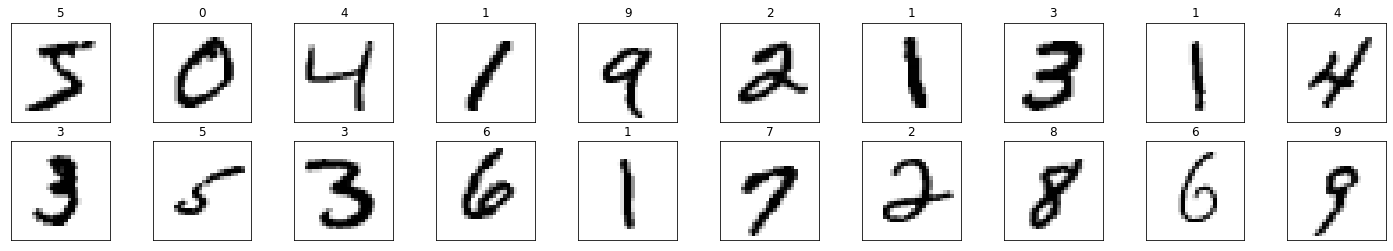

In [18]:
fig = plt.figure(figsize=(25, 4)) 
for idx in np.arange(20):
   image, label = xy_trainPT[idx]
   #print(label,image.shape)
   ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
   
   hello = torch.squeeze(image,dim=0)
   #hello = image[0,:,:]
   #print(hello.shape)

   ax.imshow(torch.squeeze(image, dim = 0).numpy(), 
             cmap=plt.cm.binary)
   ax.set_title(str(label))

In [19]:
# image,label = xy_trainPT[0]
# print( type(image), type(label) )

# print(image.shape, image.size())

# print(image.shape[0], image.shape[1], image.shape[2] )

# dummy = torch.Tensor([[ [1,2,3], [9,6,1], [2,3,5] ]])
# print(dummy)
# print(dummy.shape)
# x = dummy.view(dummy.shape[0], -1)
# print(x,x.shape)

# converts (1,28,28) into (1, 28*28)
image, _ = xy_trainPT[0] 
print(image.size())
image_flatten = image.view(image.shape[0], -1)
print (image_flatten.size())

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [20]:
modelPT = torch.nn.Sequential(
    torch.nn.Linear(784,10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10,10),
    torch.nn.LogSoftmax(dim=1)
)

# modelPT= torch.nn.Sequential(            
#          torch.nn.Linear(784,10),
#          torch.nn.Sigmoid(), 
#          torch.nn.Linear(10,10), 
#          torch.nn.LogSoftmax(dim=1) 
#          )

In [21]:
criteria = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(modelPT.parameters(), lr=0.01)
optimizer.zero_grad()

for epoch in range(EPOCH):
    running_loss = 0
    for images, labels in xy_trainPT_loader:
        #print(images.shape, labels.shape)

        images = images.view(images.shape[0],-1)
        #print(images.shape)
        output = modelPT(images)
        loss = criteria(output,labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
    print(f"Epoch {epoch} - Training loss: {running_loss/len(xy_trainPT_loader)}")
        

        #print( output[0,:], labels[0] )
        #y = criteria(output[0,:],labels[0])
        #print("y", y)
        #print(output[0:5,0:10])
        #print("Op: ", output.shape)
        #print(output[0,:])

# 1: for e in range(EPOCHS):
#       running_loss = 0
# 2:    for images, labels in xy_trainPT_loader:
# 3:        images = images.view(images.shape[0], -1)
# 4:        output = modelPT(images)
# 5:        loss = criterion(output, labels)
# 6:        loss.backward()
# 7:        optimizer.step()
# 8:        optimizer.zero_grad()
#           running_loss += loss.item()
#       print(“Epoch {} — Training loss: {}”.format(e, 
#              running_loss/len(xy_trainPT_loader)))

Epoch 0 - Training loss: 2.2132511077913395
Epoch 1 - Training loss: 1.9652295383308995
Epoch 2 - Training loss: 1.660677997415254
Epoch 3 - Training loss: 1.3897665683140379
Epoch 4 - Training loss: 1.182152321788548
Epoch 5 - Training loss: 1.0288850171987944
Epoch 6 - Training loss: 0.9141660760333543
Epoch 7 - Training loss: 0.8257133342119168
Epoch 8 - Training loss: 0.7556303644548855
Epoch 9 - Training loss: 0.6989652108409004


In [26]:
xy_testPT = torchvision.datasets.MNIST(root='./data', 
            train=False, download=True, 
            transform=torchvision.transforms.
            Compose([torchvision.transforms.ToTensor()]))
xy_test_loaderPT = torch.utils.data.DataLoader(xy_testPT)
correct_count, all_count = 0, 0
for images,labels in xy_test_loaderPT:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    logps = modelPT(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1
print("\nAccuracy of the model =", (correct_count/all_count))   


Accuracy of the model = 0.8639
